In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Show plots inline.
%matplotlib inline

# Number of harmonics to include in subsequent plots.
Harmonics = 10
# Time in seconds.
Time = 2.0
# Plot resolution.
Steps = 200

In [42]:
# Array of step values.
def time_space(sec=Time, samples=Steps):
    '''An array of equally spaced samples over a period of time.'''
    # One extra sample to also include the endpoint.
    return np.linspace(0, sec, num=samples + 1)

def sample_rate(sec=Time, samples=Steps):
    '''Sampling rate in samples per second.'''
    return float(samples + 1) / float(sec)

def sample_spacing(sec=Time, samples=Steps):
    '''Time between samples.'''
    return float(sec) / float(samples + 1)

def frequency_spectrum(data):
    '''Perform an FFT on `data`.'''
    # Get the signal frequencies.
    fft = np.abs(np.fft.fft(data))
    
    # Get the frequencies for a DFT plot (this doesn't depend on the actual signal) based on the 
    # spacing of our samples.
    freqs = np.fft.fftfreq(len(fft), d=sample_spacing())
    
    return freqs, fft

def plot_signal_and_spectrum(domain, data):
    '''Plot the signal and spectrum in a stacked plot.'''
    plt.figure(figsize=(10,6))
    plt.subplot(211)
    plt.axhline(color='k', linewidth=0.75)
    plt.plot(domain, data)
    
    freqs, mags = frequency_spectrum(data)
    num_freqs = Harmonics * 2
    plt.subplot(212)
    plt.xticks(range(num_freqs))
    plt.plot(freqs[:num_freqs], mags[:num_freqs], 'x')

# Basic Waves

## Sine Wave

Sine waves are easy. 😁 The have a single frequency, and no harmonics.

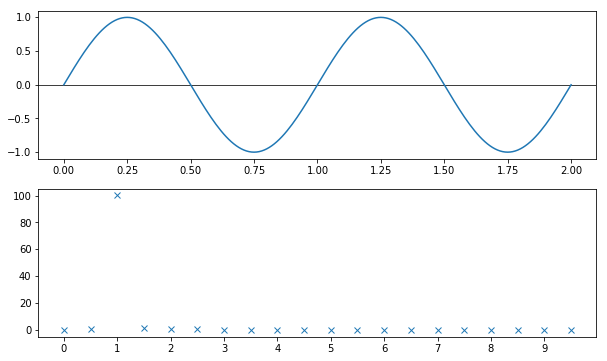

In [43]:
# Sine wave.

def sine(domain, freq=1.0):
    return np.sin(2.0 * np.pi * freq * domain)

wave = sine(time_space())
plot_signal_and_spectrum(time_space(), wave)

## Saw Wave

Saw waves consist of every integer harmonic _n_ above the fundamental frequency, where that harmonic's amplitude is n<sup>-1</sup>.

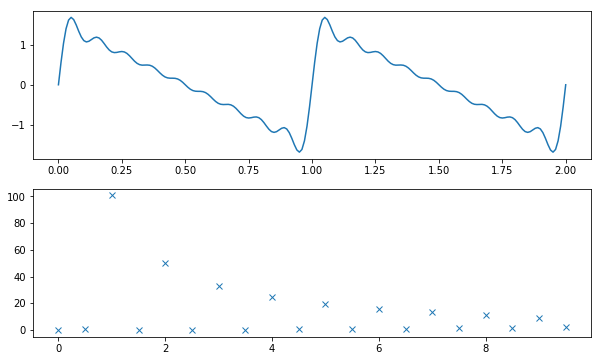

In [30]:
def saw(domain, freq=1):
    harmonics = np.asarray([1.0 / h * sine(domain, freq=freq * h) for h in range(1, Harmonics)])
    wave = np.sum(harmonics, axis=0)
    return wave

wave = saw(time_space())
plot_signal_and_spectrum(time_space(), wave)

You can invert a saw wave to get what many synths call a "blade" wave. Instead of gradually falling and then spiking up, blade waves gradually rise and the sharply fall.

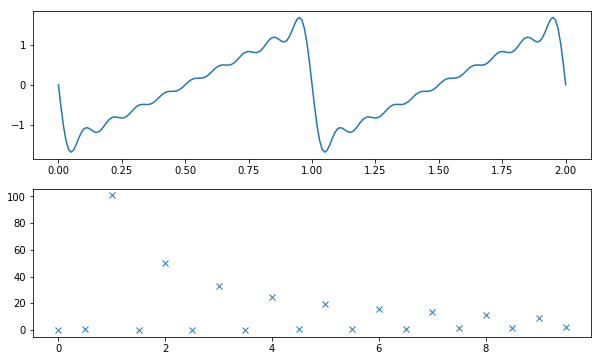

In [31]:
plot_signal_and_spectrum(time_space(), -1 * saw(time_space()))

## Square Wave

Square waves are made of every other harmonic above the fundamental frequency. Again, the amplitude of each harmonic _n_ is _1 / n_.

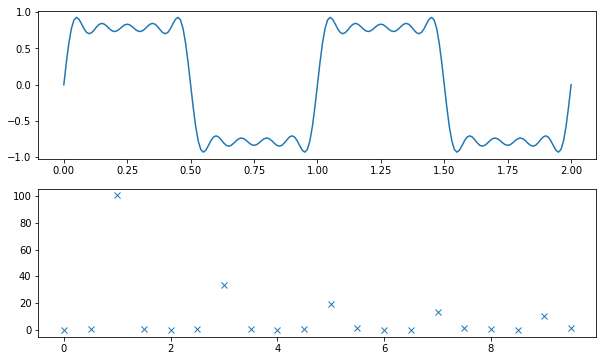

In [32]:
def square(domain, freq=1):
    harmonics = np.asarray([1.0 / h * sine(domain, freq=freq * h) for h in range(1, Harmonics, 2)])
    wave = np.sum(harmonics, axis=0)
    return wave

wave = square(time_space())
plot_signal_and_spectrum(time_space(), wave)

## Triangle Wave

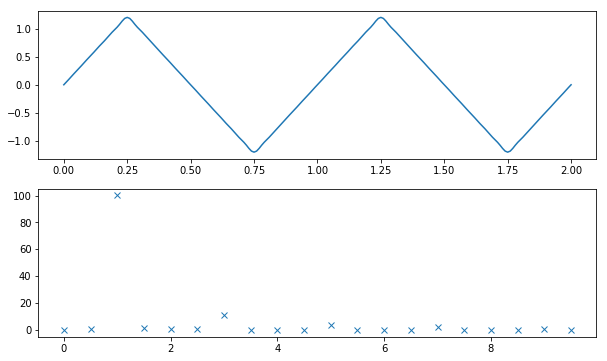

In [33]:
def triangle(domain, freq=1):
    def label(i):
        return 2. * i + 1.
    harmonics = np.asarray([((-1) ** h) * (label(h) ** -2) * sine(domain, freq=freq * label(h)) for h in range(Harmonics)])
    wave = np.sum(harmonics, axis=0)
    return wave

wave = triangle(time_space())
plot_signal_and_spectrum(time_space(), wave)